# Введение
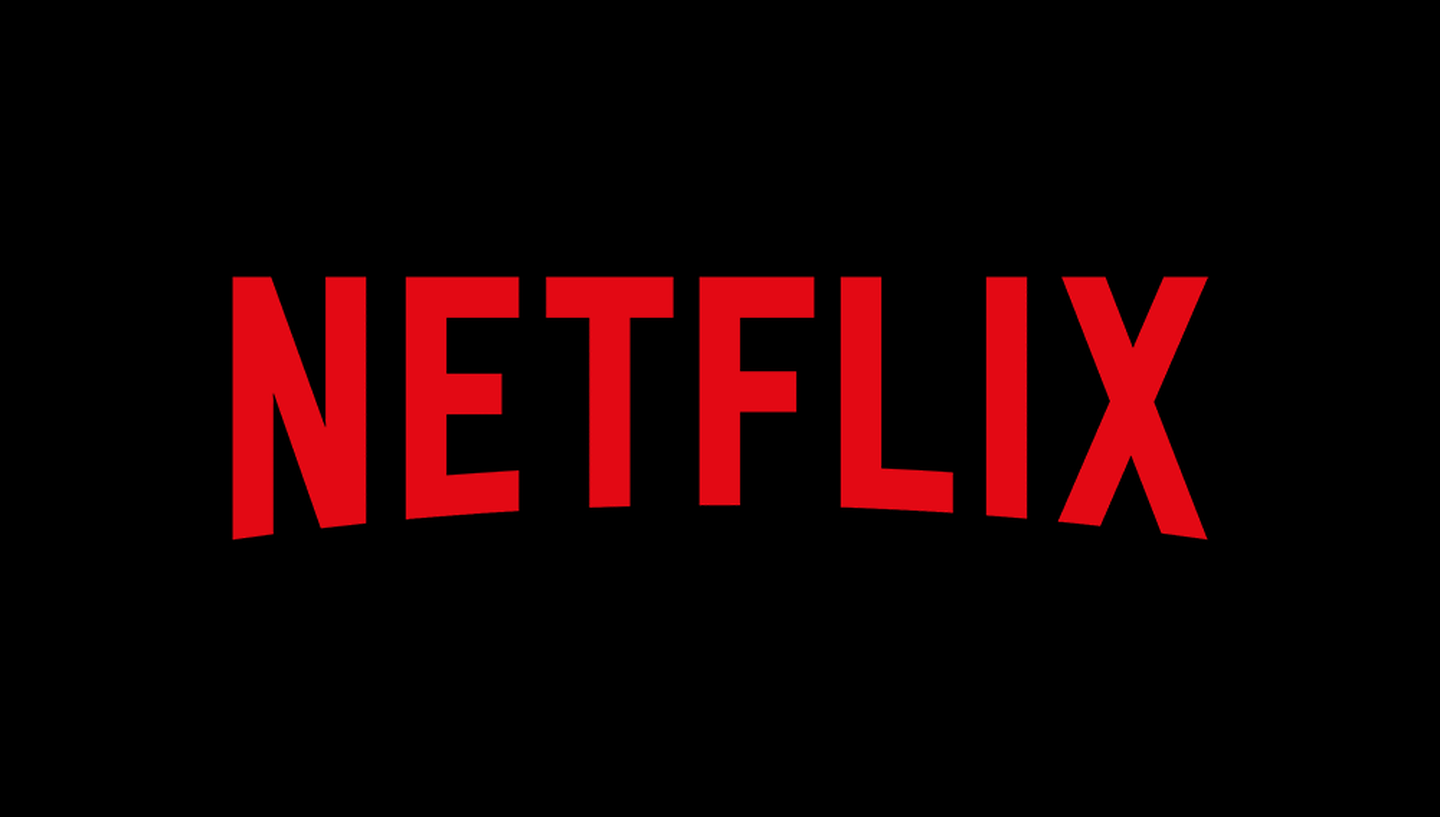
**Netflix** - это сервис, предлагающий широкий выбор телепередач, фильмов, аниме, документальных фильмов и многого другого на различных устройствах.

В 2018 году они опубликовали отчет, который показывает, что количество телепередач на Netflix почти утроилось по сравнению с 2010 годом, а  количество фильмов в потоковом сервисе сократилось более чем на 2000 наименований по сравнению с 2010 годом. Будет весьма интересно узнать, что еще можно получить из того же набора данных.






---


*Задачи исследования*:


1.   Понимание того, какой контент популярен в различных странах.
2.   Правда ли, что в последние годы Netflix все больше фокусируется на телевидении, а не на кино?

# Подготовка данных

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("netflix_titles.csv")

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


**Исследуем данные**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


**Удаление дубликатов**

In [ ]:
dups=df.duplicated(['title','country','type','release_year'])
df[dups]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [ ]:
df.duplicated().value_counts()

False    7787
dtype: int64

In [ ]:
# Проверка отсутствия дубликатов
df.duplicated().any()

False

In [ ]:
# Находим отсутствующие значения
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

Мы можем наблюдать, что 11 типов данных являются объектами, а 1 - целыми числами.

**Заполняем отсутствующие значения**

In [ ]:
# Разбираемся с датами
df["date_added"].value_counts().to_frame()

,date_added
"January 1, 2020",118
"November 1, 2019",94
"December 31, 2019",76
"March 1, 2018",76
"October 1, 2018",72
...,...
"January 8, 2018",1
"May 8, 2017",1
"April 17, 2016",1
"February 16, 2014",1


In [ ]:
# Заменяем значения nan в data_added 
df["date_added"] = df["date_added"].fillna(df["date_added"].mode()[0])

In [ ]:
df["date_added"].isnull().sum()

0

In [ ]:
# Заменяем значения nan в country
df["country"] = df["country"].fillna(df["country"].mode()[0])

In [ ]:
df["country"].isnull().sum()

0

In [ ]:
rating_order = df["rating"].value_counts().to_frame()
rating_order

,rating
TV-MA,2863
TV-14,1931
TV-PG,806
R,665
PG-13,386
TV-Y,280
TV-Y7,271
PG,247
TV-G,194
NR,84


# Анализ данных

Строим график количества фильмов определенного рейтинга

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


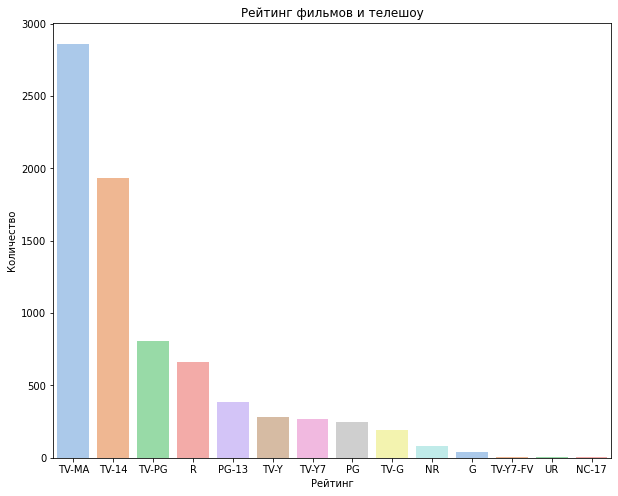

In [ ]:
plt.figure(figsize = (10,8))
sns.countplot(df.rating, order = rating_order.index[0:15], palette="pastel")
plt.title("Рейтинг фильмов и телешоу")
plt.xlabel("Рейтинг")
plt.ylabel("Количество")
plt.show()



---


На основании данного графика видно, что преобладают фильмы с рейтингов TV-MA и TV-14


Уточняем график. Распределение по типам фильм / шоу в зависимости от рейтинга

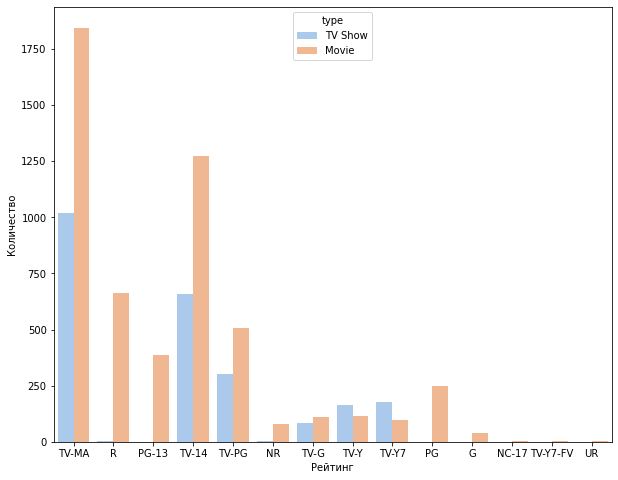

In [ ]:
plt.figure(figsize = (10,8))
sns.countplot(x='rating', data=df, hue='type', palette="pastel")
plt.xlabel("Рейтинг")
plt.ylabel("Количество")
plt.show()

При распределении фильмов по рейтингу по типам фильм/шоу видно, что тв-шоу в рейтингах TV-MA и TV-14 в среднем в два раза меньше по количеству, чем фильмов в данных категориях.

In [ ]:
df["rating"] = df["rating"].fillna(df["rating"].mode()[0])

In [ ]:
df["rating"].isnull().sum()

0

In [ ]:
df["director"].value_counts().to_frame()

,director
"Raúl Campos, Jan Suter",18
Marcus Raboy,16
Jay Karas,14
Cathy Garcia-Molina,13
Youssef Chahine,12
...,...
Julian Jarrold,1
Edward Zwick,1
Blayne Weaver,1
Anil Sharma,1


In [ ]:
df["director"] = df["director"].fillna(df["director"].mode()[0])

In [ ]:
df["director"].isnull().sum()

0

In [ ]:
df["cast"].value_counts().to_frame()

,cast
David Attenborough,18
Samuel West,10
Jeff Dunham,7
"Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath",6
Kevin Hart,6
...,...
"Min-sik Choi, Do-won Kwak, Eun-kyung Shim, So-ri Moon, Mi-ran Ra, Hye-young Ryu, Ki Hong Lee, Sun-gyu Jin, Joo-yeon Lee, Byeong-eun Park",1
"Tony Sun, Wallace Huo, Esther Liu, Cyndi Wang, Zax Wang, Sam Wang, Jason Hsu, Whyn Wu, Ben Lee, Vicky Chen",1
"Lucy Loken, Laura Bilgeri, Rusty Joiner, Alexandria Deberry, Dakota Bruton, Theresa Sutera, Vin Morreale Jr., Shelby Alicea, Tyler Joseph Campbell, Lestonja Diaz",1
"Shahid Kapoor, Genelia D'Souza, Mohnish Bahl, Satish Shah, Parikshat Sahni, Vikas Bhalla, Kurush Deboo, Zain Khan",1


In [ ]:
df["cast"] = df["cast"].fillna(df["cast"].mode()[0])

In [ ]:
df["cast"].isnull().sum()

0

In [ ]:
# Устанавливаем тип данных для даты
df["date_added"] = pd.to_datetime(df['date_added'])
df['day_added'] = df['date_added'].dt.day
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['year_added'].astype(int);
df['day_added'].astype(int);
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added
0,s1,TV Show,3%,"Raúl Campos, Jan Suter","João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23,2016,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20,2018,12


# Визуализация данных, работа с Matplotlib

Визуализация

In [ ]:
movies_count = df[df.type == "Movie"]
tvshows_count = df[df["type"] == "TV Show"]

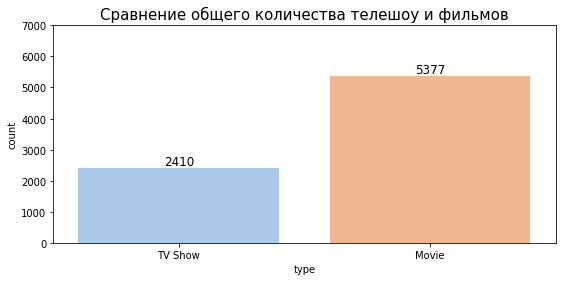

In [ ]:
plt.figure(figsize=(9,4))
sns.countplot(x="type", data=df, palette="pastel")

# Получаем текущие оси на текущем рисунке
ax = plt.gca()

# Устанавливаем значение ylim max
y_max = df['type'].value_counts().max() 
ax.set_ylim([0, 7000])

# Итерация по списку участков на осях.
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')


plt.title('Сравнение общего количества телешоу и фильмов',size='15')
plt.show()

Фильмы преобладают над телешоу почти в 2,25 раз (по миру)

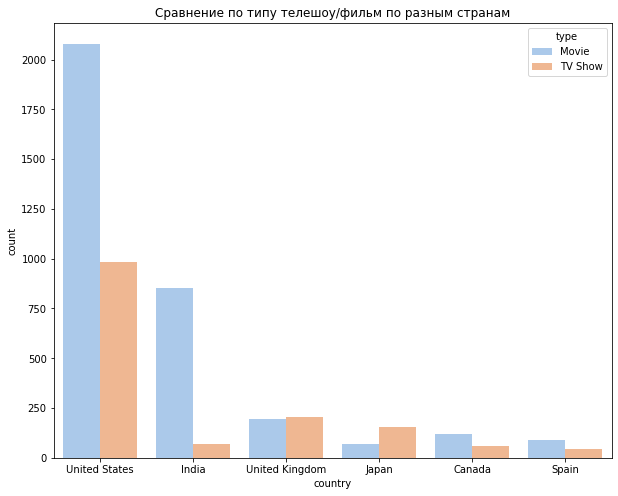

In [ ]:
top_productive_countries=df[(df['country']=='United States')|(df['country']=='India')|(df['country']=='United Kingdom')|(df['country']=='Japan')|
                             (df['country']=='Canada')|(df['country']=='Spain')]
plt.figure(figsize=(10,8))
sns.countplot(x='country',hue='type',data=top_productive_countries, palette='pastel')
plt.title('Сравнение по типу телешоу/фильм по разным странам')
plt.show()

В Индии самый большой разброс, фильмы преобладают над телешоу примерно в 8 раз, а вот в Соединенных штатах Америки телешоу выпускают больше, чем фильмов.

In [ ]:
year_wise_content = df.release_year.value_counts().index[:20]
year_wise_content

Int64Index([2018, 2017, 2019, 2016, 2020, 2015, 2014, 2013, 2012, 2010, 2011,
            2009, 2008, 2006, 2007, 2005, 2004, 2003, 2002, 2001],
           dtype='int64')

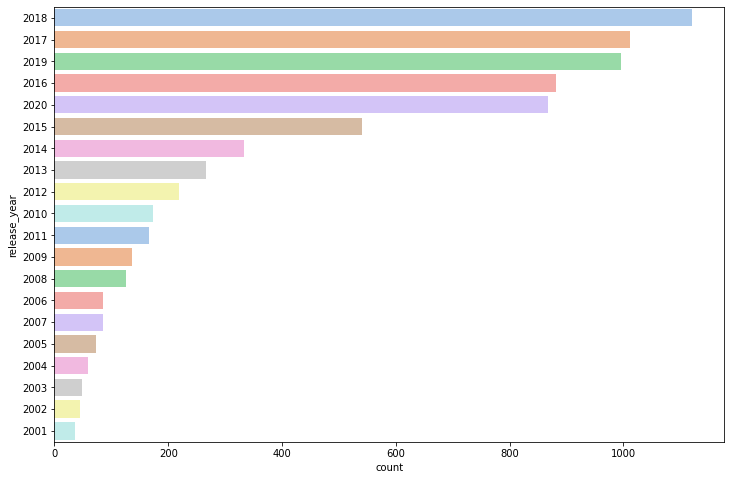

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, y="release_year", order=year_wise_content, palette="pastel")

Самое большое количество релизов приходится на 2018 год

# Анализ отечественного контента на Netflix

**Русский контент на Netflix**


In [ ]:
netflix_rus = df[df.country == "Russia"]
netflix_rus.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added
779,s780,TV Show,Be-Be-Bears,"Raúl Campos, Jan Suter","Nataliya Medvedeva, Polina Kutepova",Russia,2018-08-29,2018,TV-Y,1 Season,Kids' TV,"Bear buddies Bucky and Bjorn play games, go on...",29,2018,8
859,s860,TV Show,Better Than Us,"Raúl Campos, Jan Suter","Paulina Andreeva, Kirill Käro, Aleksandr Ustyu...",Russia,2019-08-16,2019,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",A family on the brink of splitting up become t...,16,2019,8
1043,s1044,TV Show,Booba,"Raúl Campos, Jan Suter",Roman Karev,Russia,2020-01-16,2019,TV-Y7,3 Seasons,"Kids' TV, TV Comedies",The world is a mystery to little Booba. But he...,16,2020,1
2116,s2117,TV Show,Fartsa,"Raúl Campos, Jan Suter","Alexander Petrov, Fillip Gorenshtein, Maksim E...",Russia,2017-08-01,2015,TV-14,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",As four Russian friends grow up in the early '...,1,2017,8
2336,s2337,Movie,Gagarin: First in Space,Pavel Parkhomenko,"Yaroslav Zhalnin, Mikhail Filippov, Olga Ivano...",Russia,2017-09-15,2013,TV-14,108 min,"Dramas, International Movies",This biopic of Russian cosmonaut Yuri Gagarin ...,15,2017,9


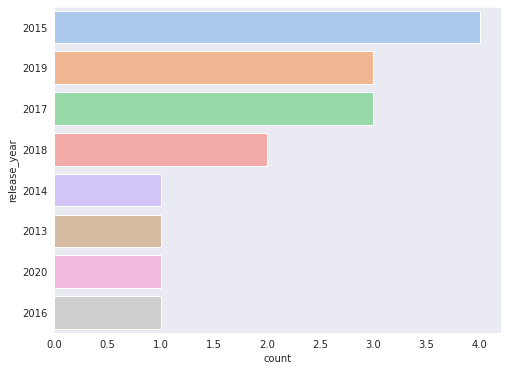

In [ ]:
plt.figure(figsize=(8,6))
sns.set_style("dark")
sns.countplot(data=netflix_rus, y="release_year", 
              order=netflix_rus.release_year.value_counts().index[:20], 
              palette="pastel")

Самое большое количество русских фильмов и ТВ-шоу на Netflix появилось в 2015 году, на втором месте 2019 год, на третьем 2017.

<Figure size 576x432 with 0 Axes>

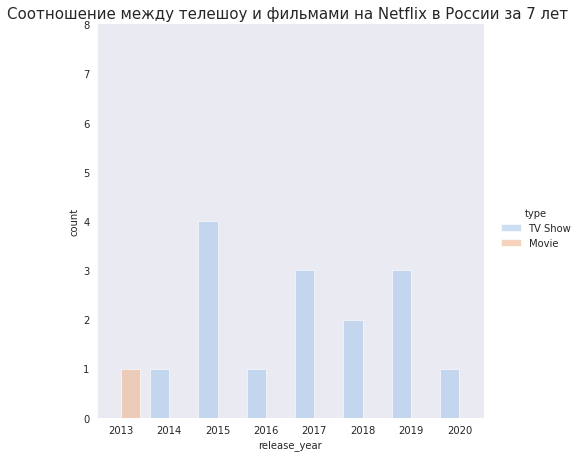

In [ ]:
plt.figure(figsize=(8,6))

RUS_10 =  netflix_rus[netflix_rus.release_year >= 2011]

g = sns.catplot(
    data=RUS_10, kind="count",
    x="release_year", hue="type",
    ci="sd", palette="pastel", alpha=.6, height=6)

ax = plt.gca()

y_max = RUS_10['type'].value_counts().max() 
ax.set_ylim([0, 8])


plt.title('Соотношение между телешоу и фильмами на Netflix в России за 7 лет ',size='15')
plt.show()

# Анализ соотношения между фильмами/сериалами в России на Netflix в масштабе 7 лет

К сожалению количество русских фильмов на Netflix крайне мало и нельзя наблюдать динамику изменения отношения количества фильмов/телешоу.

Тем не менее, мы можем наблюдать что за 7 лет наибольшее количество русских сериалов на Netflix появилось в 2015 году. 
Это может быть связано с тем, что:


```
# Раньше у нас была только «Оттепель» – сериал, поднявший планку на высочайший уровень по актерской игре, небанальным любовным сюжетам, по-настоящему хорошему юмору. С тех пор актер Евгений Цыганов, исполнивший в «Оттепели» главную роль, появляется, словно переходящее знамя, чуть ли не во всех достойных сериальных проектах («Фарца», «Озабоченные, или Любовь зла»). Словно чтобы показать: я тут, все в порядке, смотрите дальше. Таких сериалов, где «все в порядке», в 2015 году появилось много, особенно отличился канал ТНТ, выстреливший лучшими, пожалуй, сериалами года: «Сладкой жизнью», «Изменами» и «Озабоченными».

Подробнее: https://sunmag.me/kultura/29-12-2015-pochemu-smotret-russkie-serialy-stalo-ne-stydno.html
```



# Анализ трендов в США

**Тренды в США**

In [ ]:
US = df[df['country'] == 'United States']
US.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16,2017,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,2020,1
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,2019-11-01,1997,R,119 min,Dramas,After one of his high school students attacks ...,1,2019,11
10,s11,Movie,1922,Zak Hilditch,"Thomas Jane, Molly Parker, Dylan Schmid, Kaitl...",United States,2017-10-20,2017,TV-MA,103 min,"Dramas, Thrillers",A farmer pens a confession admitting to his wi...,20,2017,10
14,s15,Movie,3022,John Suits,"Omar Epps, Kate Walsh, Miranda Cosgrove, Angus...",United States,2020-03-19,2019,R,91 min,"Independent Movies, Sci-Fi & Fantasy, Thrillers",Stranded when the Earth is suddenly destroyed ...,19,2020,3


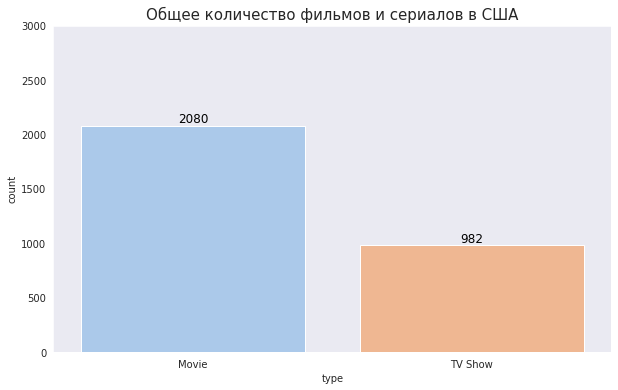

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='type', data=US, palette='pastel')
 
 
ax = plt.gca()
 
y_max = US['type'].value_counts().max() 
ax.set_ylim([0, 3000])
 
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
 
 
plt.title('Общее количество фильмов и сериалов в США',size='15')
plt.show()

В США наблюдается та же динамика, что и по миру. Но фильмы преобладают над телешоу в 2,12 раза

<Figure size 576x432 with 0 Axes>

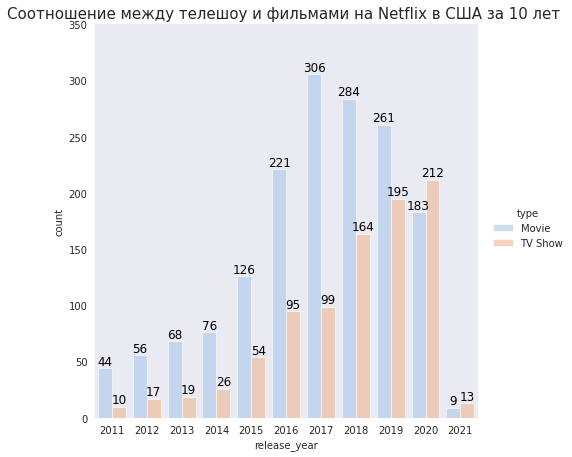

In [ ]:
plt.figure(figsize=(8,6))

US_5 =  US[US.release_year >= 2011]

g = sns.catplot(
    data=US_5, kind="count",
    x="release_year", hue="type",
    ci="sd", palette="pastel", alpha=.6, height=6)

ax = plt.gca()

y_max = US_5['type'].value_counts().max() 
ax.set_ylim([0, 350])

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

plt.title('Соотношение между телешоу и фильмами на Netflix в США за 10 лет ',size='15')
plt.show()

# Анализ графика фильмов/сериалов в США в динамике по годам в масштабе 10 лет

На данном графике мы можем наблюдать, что с 2017 года в США разброс между количеством телешоу и фильмов сокращается, так в 2020 году было выпущено 183 фильма и 212 телешоу. То есть количество сериалов сильно возросло, произошла смена тренда. Это может быть связано с тем, что 

```
# Сериалы создают пласт для социальной коммуникации, так необходимого человеку обсуждения. Популярный продукт сериального кинопроизводства имеет многочасовую продолжительность, что позволяет создать целый дискуссионный базис на основе какого-либо момента или персонажа. 
Об этом сообщает "Рамблер". Далее: https://kino.rambler.ru/series/43227171/?utm_content=kino_media&utm_medium=read_more&utm_source=copylink
```

**Таким образом, фильмов в 2020 году было выпущено в 1,16 раз меньше, чем телешоу.**
В 2021 году на один фильм в среднем приходится 
1,44 телешоу, но судя по тенденции это число будет увеличиваться.

In [ ]:
df_rus = df[df.country == "Russia"]
df_rus.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added
779,s780,TV Show,Be-Be-Bears,"Raúl Campos, Jan Suter","Nataliya Medvedeva, Polina Kutepova",Russia,2018-08-29,2018,TV-Y,1 Season,Kids' TV,"Bear buddies Bucky and Bjorn play games, go on...",29,2018,8
859,s860,TV Show,Better Than Us,"Raúl Campos, Jan Suter","Paulina Andreeva, Kirill Käro, Aleksandr Ustyu...",Russia,2019-08-16,2019,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",A family on the brink of splitting up become t...,16,2019,8
1043,s1044,TV Show,Booba,"Raúl Campos, Jan Suter",Roman Karev,Russia,2020-01-16,2019,TV-Y7,3 Seasons,"Kids' TV, TV Comedies",The world is a mystery to little Booba. But he...,16,2020,1
2116,s2117,TV Show,Fartsa,"Raúl Campos, Jan Suter","Alexander Petrov, Fillip Gorenshtein, Maksim E...",Russia,2017-08-01,2015,TV-14,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",As four Russian friends grow up in the early '...,1,2017,8
2336,s2337,Movie,Gagarin: First in Space,Pavel Parkhomenko,"Yaroslav Zhalnin, Mikhail Filippov, Olga Ivano...",Russia,2017-09-15,2013,TV-14,108 min,"Dramas, International Movies",This biopic of Russian cosmonaut Yuri Gagarin ...,15,2017,9


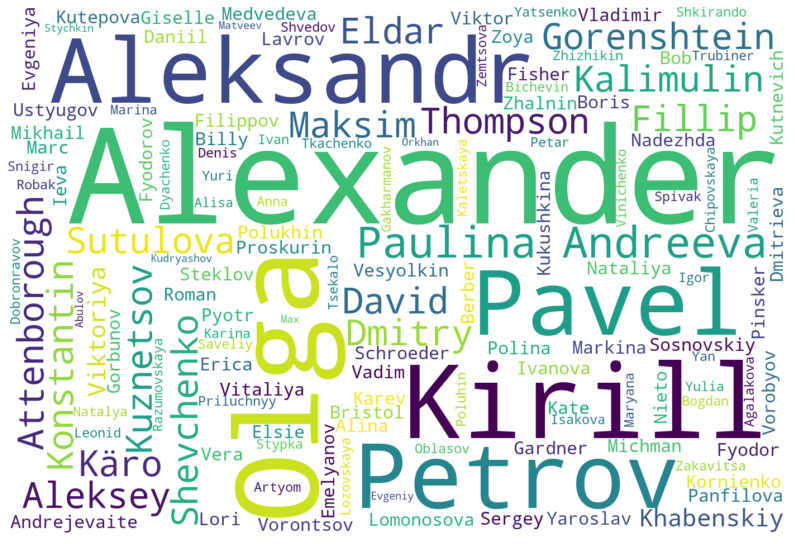

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white", width=1400, height=950).generate(" ".join(df_rus.cast))

plt.figure(figsize=(14,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.figure(1, figsize=(12, 12))
plt.show()

# Выводы

Перед нами стояли такие задачи, как:

**Понять то, какой контент популярен в различных странах.
Узнать правда ли, что в последние годы Netflix все больше фокусируется на телевидении, а не на кино?**

В ходе исследования мы пришли к тому, что **В Индии самый большой разброс, фильмы преобладают над телешоу примерно в 8 раз, а вот в Соединенных штатах Америки телешоу выпускают больше, чем фильмов.**

Также было замечено, что **самое большое количество русских фильмов и ТВ-шоу на Netflix появилось в 2015 году**, на втором месте 2019 год, на третьем 2017.
К сожалению количество русских фильмов на Netflix крайне мало и нельзя наблюдать динамику изменения отношения количества фильмов/телешоу.

Тем не менее, мы можем наблюдать что за 7 лет наибольшее количество русских сериалов на Netflix появилось в 2015 году. Это может быть связано с тем, что:


> Отношение к сериальному жанру в принципе изменилось и у смотрящих, и у создающих. Сериал – это, конечно, не новая книга и не новое кино. Но уже и Стивен Содерберг сам стоит за камерой («Больница Никербокер»), и актеры играют свои лучшие роли (Мэттью Макконахи в «Настоящем детективе», Клэр Дейнс в «Родине»).




Мы можем наблюдать, что с 2017 года в США разброс между количеством телешоу и фильмов сокращается, так в 2020 году было выпущено 183 фильма и 212 телешоу. **То есть количество сериалов сильно возросло, произошла смена тренда.** Это может быть связано с тем, что:

>Сериалы создают пласт для социальной коммуникации, так необходимого человеку обсуждения. Популярный продукт сериального кинопроизводства имеет многочасовую продолжительность, что позволяет создать целый дискуссионный базис на основе какого-либо момента или персонажа.
 
 Из вышесказанного можно сделать вывод о том, что **фильмов в 2020 году было выпущено в 1,16 раз меньше, чем телешоу. В 2021 году на один фильм в среднем приходится 1,44 телешоу, но судя по тенденции это число будет увеличиваться.**